<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-10-22 21:00:58--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  70.5MB/s    in 2.2s    

2025-10-22 21:01:00 (70.5 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



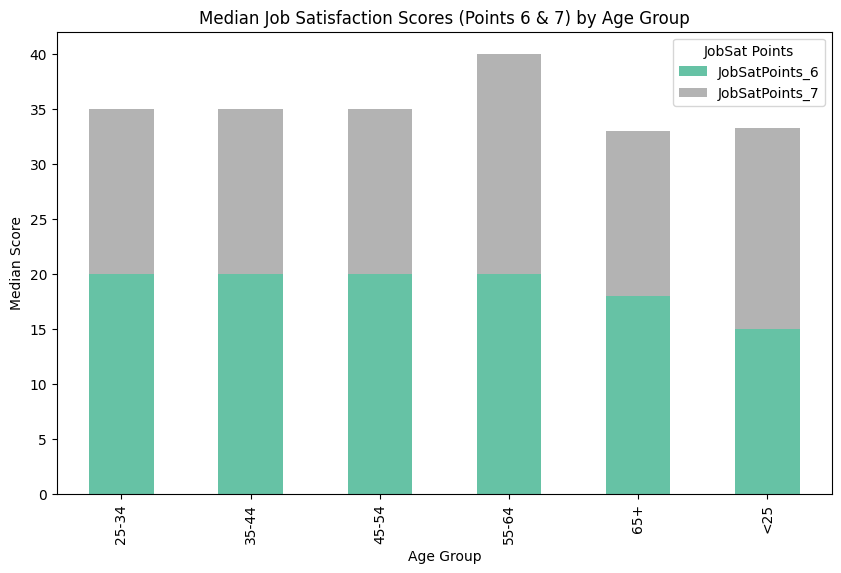

In [8]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Conexión a la base de datos ---
conn = sqlite3.connect("survey-data.sqlite")

# --- Leer columnas de interés ---
query = """
SELECT Age, JobSatPoints_6, JobSatPoints_7
FROM main
WHERE Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Función para convertir edades a grupos ---
def age_to_group(age_str):
    if 'Under' in age_str:
        return '<25'
    elif '18-24' in age_str:
        return '<25'
    elif '25-34' in age_str:
        return '25-34'
    elif '35-44' in age_str:
        return '35-44'
    elif '45-54' in age_str:
        return '45-54'
    elif '55-64' in age_str:
        return '55-64'
    else:
        return '65+'

df['AgeGroup'] = df['Age'].apply(age_to_group)

# --- Convertir a numérico las puntuaciones y eliminar nulos ---
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')
df = df.dropna(subset=['JobSatPoints_6','JobSatPoints_7'])

# --- Calcular mediana por grupo de edad ---
median_scores = df.groupby('AgeGroup')[['JobSatPoints_6','JobSatPoints_7']].median()

# --- Graficar stacked bar chart ---
median_scores.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Median Job Satisfaction Scores (Points 6 & 7) by Age Group")
plt.ylabel("Median Score")
plt.xlabel("Age Group")
plt.legend(title="JobSat Points")
plt.show()

# --- Cerrar la conexión ---
conn.close()



##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


/tmp/ipykernel_1262/2566771299.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


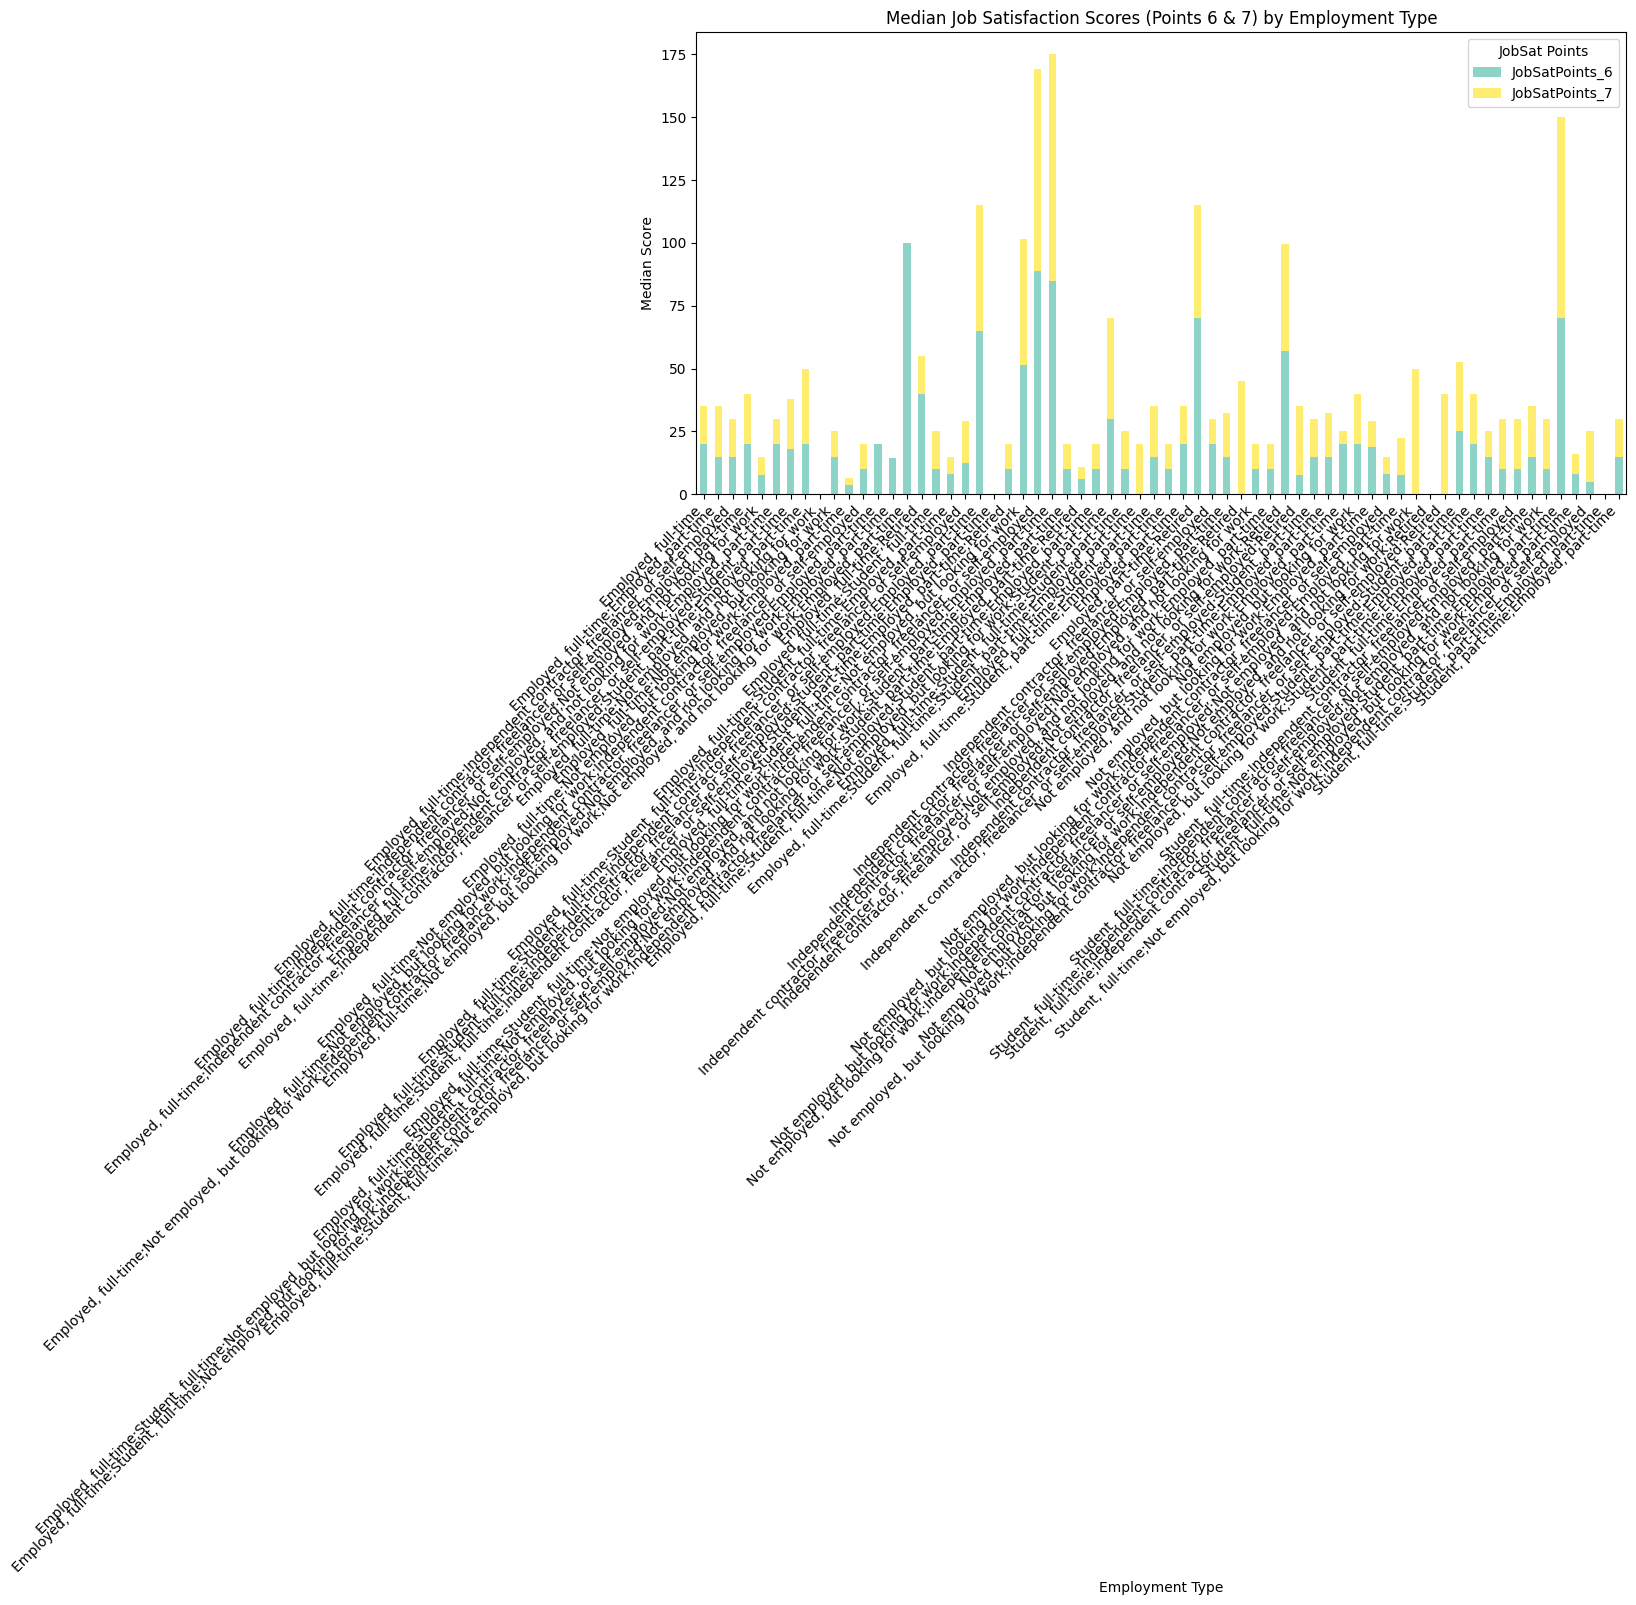

In [9]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Conexión a la base de datos ---
conn = sqlite3.connect("survey-data.sqlite")

# --- Leer columnas de interés ---
query = """
SELECT Employment, JobSatPoints_6, JobSatPoints_7
FROM main
WHERE Employment IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Convertir a numérico las puntuaciones y eliminar nulos ---
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['JobSatPoints_7'] = pd.to_numeric(df['JobSatPoints_7'], errors='coerce')
df = df.dropna(subset=['JobSatPoints_6', 'JobSatPoints_7'])

# --- Calcular mediana por tipo de empleo ---
median_scores = df.groupby('Employment')[['JobSatPoints_6','JobSatPoints_7']].median()

# --- Graficar stacked bar chart ---
median_scores.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set3')
plt.title("Median Job Satisfaction Scores (Points 6 & 7) by Employment Type")
plt.ylabel("Median Score")
plt.xlabel("Employment Type")
plt.xticks(rotation=45, ha='right')
plt.legend(title="JobSat Points")
plt.tight_layout()
plt.show()

# --- Cerrar la conexión ---
conn.close()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


/tmp/ipykernel_1262/39021167.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ConvertedCompYearly'] = pd.to_numeric(df_filtered['ConvertedCompYearly'], errors='coerce')
/tmp/ipykernel_1262/39021167.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['JobSatPoints_6'] = pd.to_numeric(df_filtered['JobSatPoints_6'], errors='coerce')


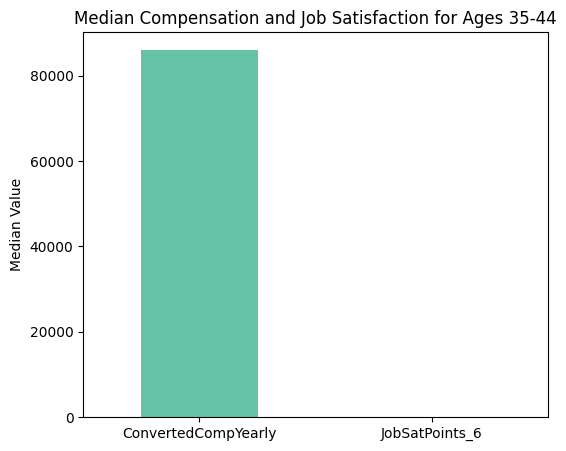

In [13]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Conexión a la base de datos ---
conn = sqlite3.connect("survey-data.sqlite")

# --- Leer columnas de interés ---
query = """
SELECT Age, ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Función para convertir edades a valores numéricos ---
def convert_age(age_str):
    try:
        if 'Under' in age_str:
            return 18
        elif '-' in age_str:  # Ej: "35-44 years old"
            parts = age_str.split('-')
            start = int(parts[0])
            end = int(parts[1].split(' ')[0])
            return (start + end) / 2
        else:
            return int(age_str.split(' ')[0])
    except:
        return None

df['AgeNum'] = df['Age'].apply(convert_age)

# --- Filtrar grupo de edad 35-44 ---
df_filtered = df[(df['AgeNum'] >= 35) & (df['AgeNum'] <= 44)]

# --- Convertir columnas a numérico y eliminar nulos ---
df_filtered['ConvertedCompYearly'] = pd.to_numeric(df_filtered['ConvertedCompYearly'], errors='coerce')
df_filtered['JobSatPoints_6'] = pd.to_numeric(df_filtered['JobSatPoints_6'], errors='coerce')
df_filtered = df_filtered.dropna(subset=['ConvertedCompYearly','JobSatPoints_6'])

# --- Calcular mediana de cada columna ---
median_values = df_filtered[['ConvertedCompYearly','JobSatPoints_6']].median()

# --- Graficar stacked bar chart ---
median_values.plot(kind='bar', stacked=True, figsize=(6,5), colormap='Set2')
plt.title("Median Compensation and Job Satisfaction for Ages 35-44")
plt.ylabel("Median Value")
plt.xticks(rotation=0)
plt.show()

# --- Cerrar la conexión ---
conn.close()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


/tmp/ipykernel_1262/2254965599.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_by_age = df.groupby('AgeGroup')[['ConvertedCompYearly','JobSatPoints_6']].median()


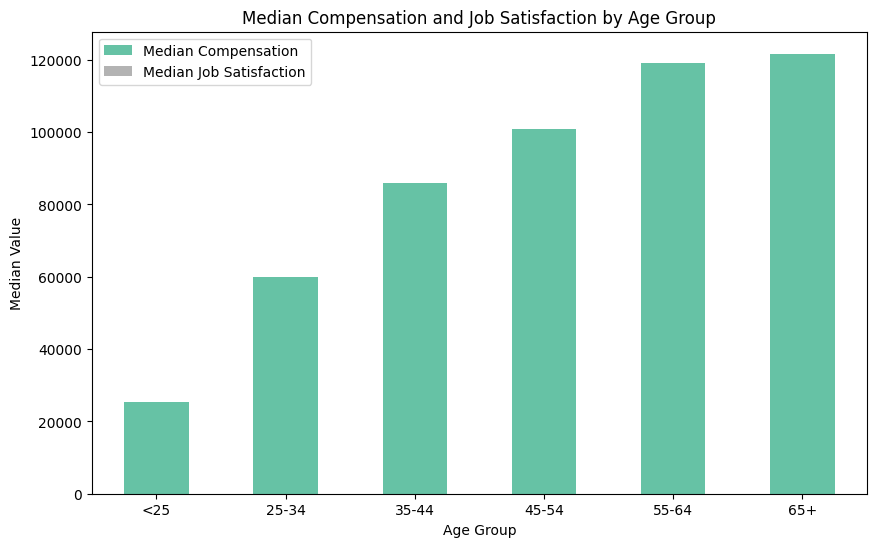

In [14]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Conexión a la base de datos ---
conn = sqlite3.connect("survey-data.sqlite")

# --- Leer columnas de interés ---
query = """
SELECT Age, ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Convertir edades a valores numéricos ---
def convert_age(age_str):
    try:
        if 'Under' in age_str:
            return 18
        elif '-' in age_str:  # Ej: "35-44 years old"
            parts = age_str.split('-')
            start = int(parts[0])
            end = int(parts[1].split(' ')[0])
            return (start + end) / 2
        else:
            return int(age_str.split(' ')[0])
    except:
        return None

df['AgeNum'] = df['Age'].apply(convert_age)

# --- Eliminar filas con edades o compensaciones inválidas ---
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df = df.dropna(subset=['AgeNum','ConvertedCompYearly','JobSatPoints_6'])

# --- Crear grupos de edad ---
bins = [0, 24, 34, 44, 54, 64, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = pd.cut(df['AgeNum'], bins=bins, labels=labels)

# --- Calcular medianas por grupo de edad ---
median_by_age = df.groupby('AgeGroup')[['ConvertedCompYearly','JobSatPoints_6']].median()

# --- Graficar stacked bar chart ---
median_by_age.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Median Compensation and Job Satisfaction by Age Group")
plt.ylabel("Median Value")
plt.xlabel("Age Group")
plt.xticks(rotation=0)
plt.legend(["Median Compensation", "Median Job Satisfaction"], loc='upper left')
plt.show()

# --- Cerrar la conexión ---
conn.close()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


/tmp/ipykernel_1262/1775167985.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_db_age = df_exp.groupby(['AgeGroup','Database']).size().unstack(fill_value=0)


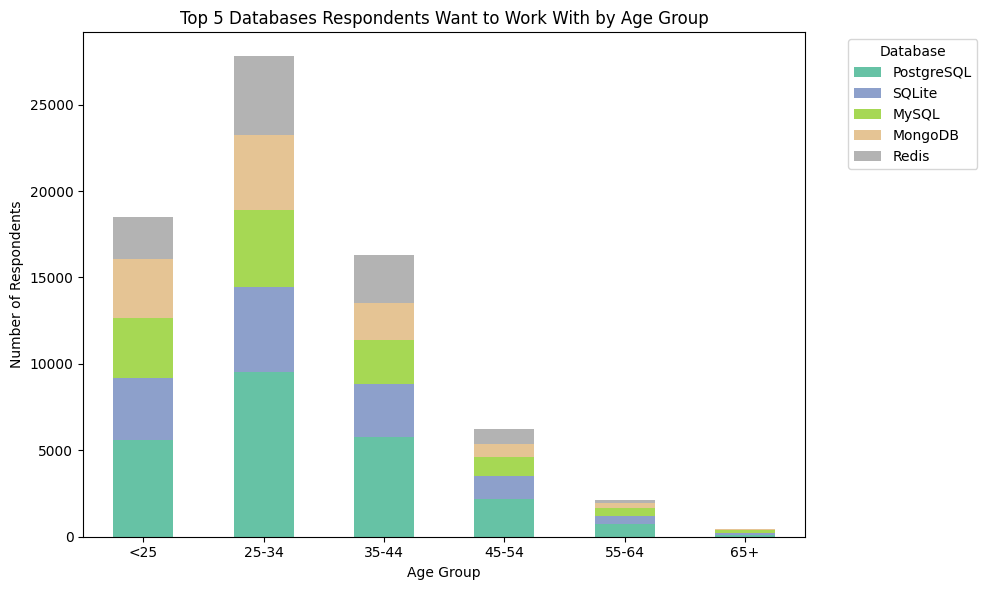

In [15]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Conexión a la base de datos ---
conn = sqlite3.connect("survey-data.sqlite")

# --- Leer columnas de interés ---
query = """
SELECT Age, DatabaseWantToWorkWith
FROM main
WHERE Age IS NOT NULL AND DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Convertir edades a valores numéricos ---
def convert_age(age_str):
    try:
        if 'Under' in age_str:
            return 18
        elif '-' in age_str:  # Ej: "35-44 years old"
            parts = age_str.split('-')
            start = int(parts[0])
            end = int(parts[1].split(' ')[0])
            return (start + end) / 2
        else:
            return int(age_str.split(' ')[0])
    except:
        return None

df['AgeNum'] = df['Age'].apply(convert_age)

# --- Crear grupos de edad ---
bins = [0, 24, 34, 44, 54, 64, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = pd.cut(df['AgeNum'], bins=bins, labels=labels)

# --- Explode de databases ---
df_exp = df.assign(Database=df["DatabaseWantToWorkWith"].str.split(";")).explode("Database")
df_exp['Database'] = df_exp['Database'].str.strip()

# --- Contar la cantidad por database y grupo de edad ---
count_db_age = df_exp.groupby(['AgeGroup','Database']).size().unstack(fill_value=0)

# --- Seleccionar las top 5 bases de datos por frecuencia total ---
top5_db = count_db_age.sum(axis=0).sort_values(ascending=False).head(5).index
count_db_age_top5 = count_db_age[top5_db]

# --- Graficar stacked bar chart ---
count_db_age_top5.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Top 5 Databases Respondents Want to Work With by Age Group")
plt.ylabel("Number of Respondents")
plt.xlabel("Age Group")
plt.xticks(rotation=0)
plt.legend(title="Database", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Cerrar conexión ---
conn.close()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


/tmp/ipykernel_1262/1877960813.py:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


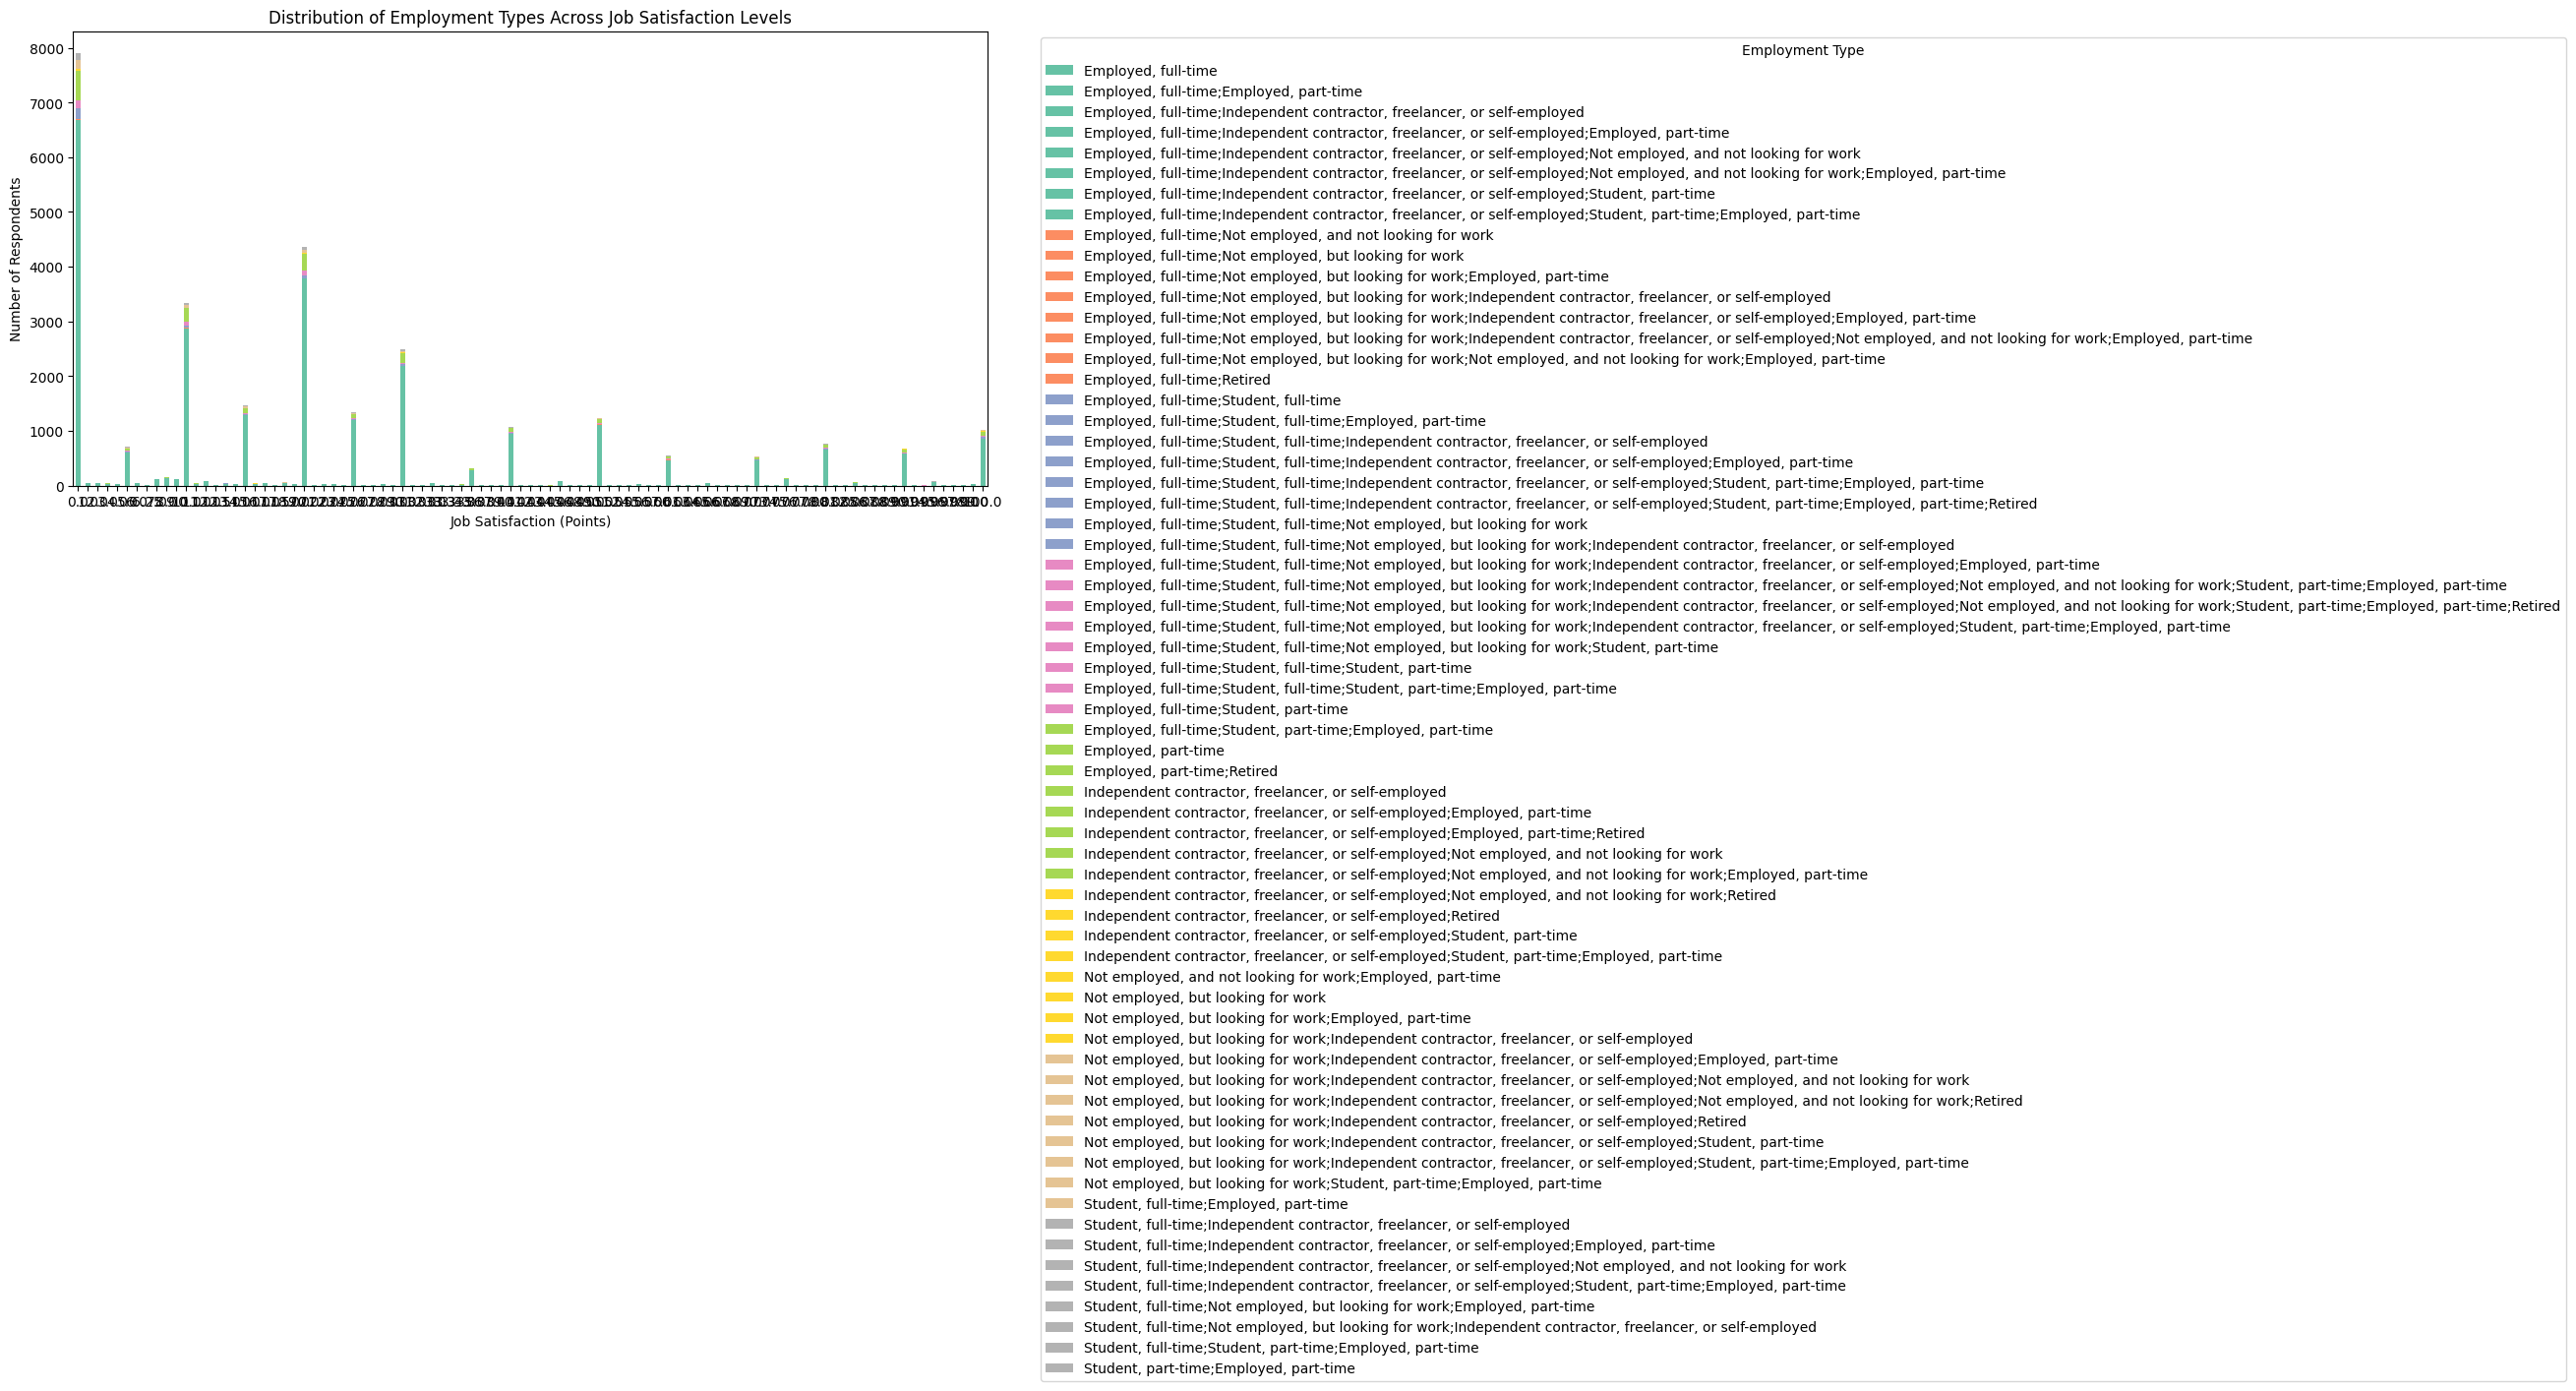

In [16]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Conexión a la base de datos ---
conn = sqlite3.connect("survey-data.sqlite")

# --- Leer columnas de interés ---
query = """
SELECT Employment, JobSatPoints_6
FROM main
WHERE Employment IS NOT NULL AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Convertir JobSatPoints_6 a numérico ---
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# --- Eliminar filas con valores nulos después de la conversión ---
df = df.dropna(subset=['JobSatPoints_6'])

# --- Crear tabla de frecuencia cruzada ---
crosstab = pd.crosstab(df['JobSatPoints_6'], df['Employment'])

# --- Graficar stacked bar chart ---
crosstab.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title("Distribution of Employment Types Across Job Satisfaction Levels")
plt.xlabel("Job Satisfaction (Points)")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=0)
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Cerrar conexión ---
conn.close()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


/tmp/ipykernel_1262/1419574537.py:44: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_lang_age = df_exp.groupby(['AgeGroup','Language']).size().unstack(fill_value=0)


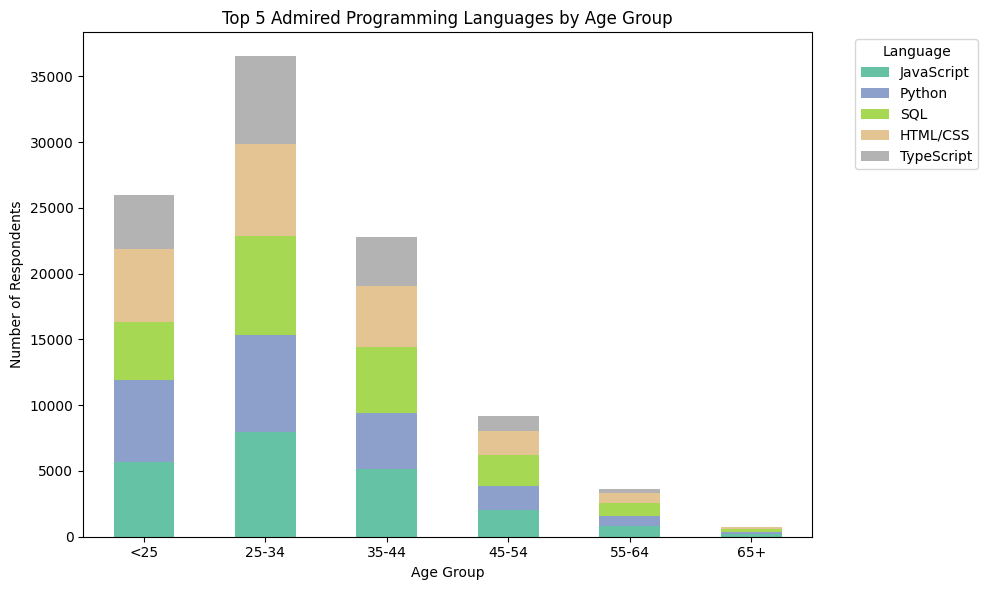

In [17]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Conexión a la base de datos ---
conn = sqlite3.connect("survey-data.sqlite")

# --- Leer columnas de interés ---
query = """
SELECT Age, LanguageAdmired
FROM main
WHERE Age IS NOT NULL AND LanguageAdmired IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# --- Convertir edades a valores numéricos ---
def convert_age(age_str):
    try:
        if 'Under' in age_str:
            return 18
        elif '-' in age_str:
            parts = age_str.split('-')
            start = int(parts[0])
            end = int(parts[1].split(' ')[0])
            return (start + end) / 2
        else:
            return int(age_str.split(' ')[0])
    except:
        return None

df['AgeNum'] = df['Age'].apply(convert_age)

# --- Crear grupos de edad ---
bins = [0, 24, 34, 44, 54, 64, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = pd.cut(df['AgeNum'], bins=bins, labels=labels)

# --- Explode de lenguajes admirados ---
df_exp = df.assign(Language=df["LanguageAdmired"].str.split(";")).explode("Language")
df_exp['Language'] = df_exp['Language'].str.strip()

# --- Contar cantidad por lenguaje y grupo de edad ---
count_lang_age = df_exp.groupby(['AgeGroup','Language']).size().unstack(fill_value=0)

# --- Seleccionar los top 5 lenguajes por frecuencia total ---
top5_lang = count_lang_age.sum(axis=0).sort_values(ascending=False).head(5).index
count_lang_age_top5 = count_lang_age[top5_lang]

# --- Graficar stacked bar chart ---
count_lang_age_top5.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Top 5 Admired Programming Languages by Age Group")
plt.ylabel("Number of Respondents")
plt.xlabel("Age Group")
plt.xticks(rotation=0)
plt.legend(title="Language", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Cerrar conexión ---
conn.close()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [ ]:
##Write your code here

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
